In [ ]:
#Task-1 DATA Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("train.csv")

In [25]:
data.head(5) #displays first five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.shape #prints the shape of the data

(891, 12)

In [27]:
pd.set_option('display.max_columns', None) #sets the maximum number of columns to be displayed in the output to None
pd.set_option('display.max_rows', None) #sets the maximum number of rows to be displayed in the output to None

In [28]:
data.head(2) #displays first two rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [29]:
data.tail(2) #displays last two rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [30]:
data.info() #summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
data.isnull().sum() #sum of missing values in each column of the dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

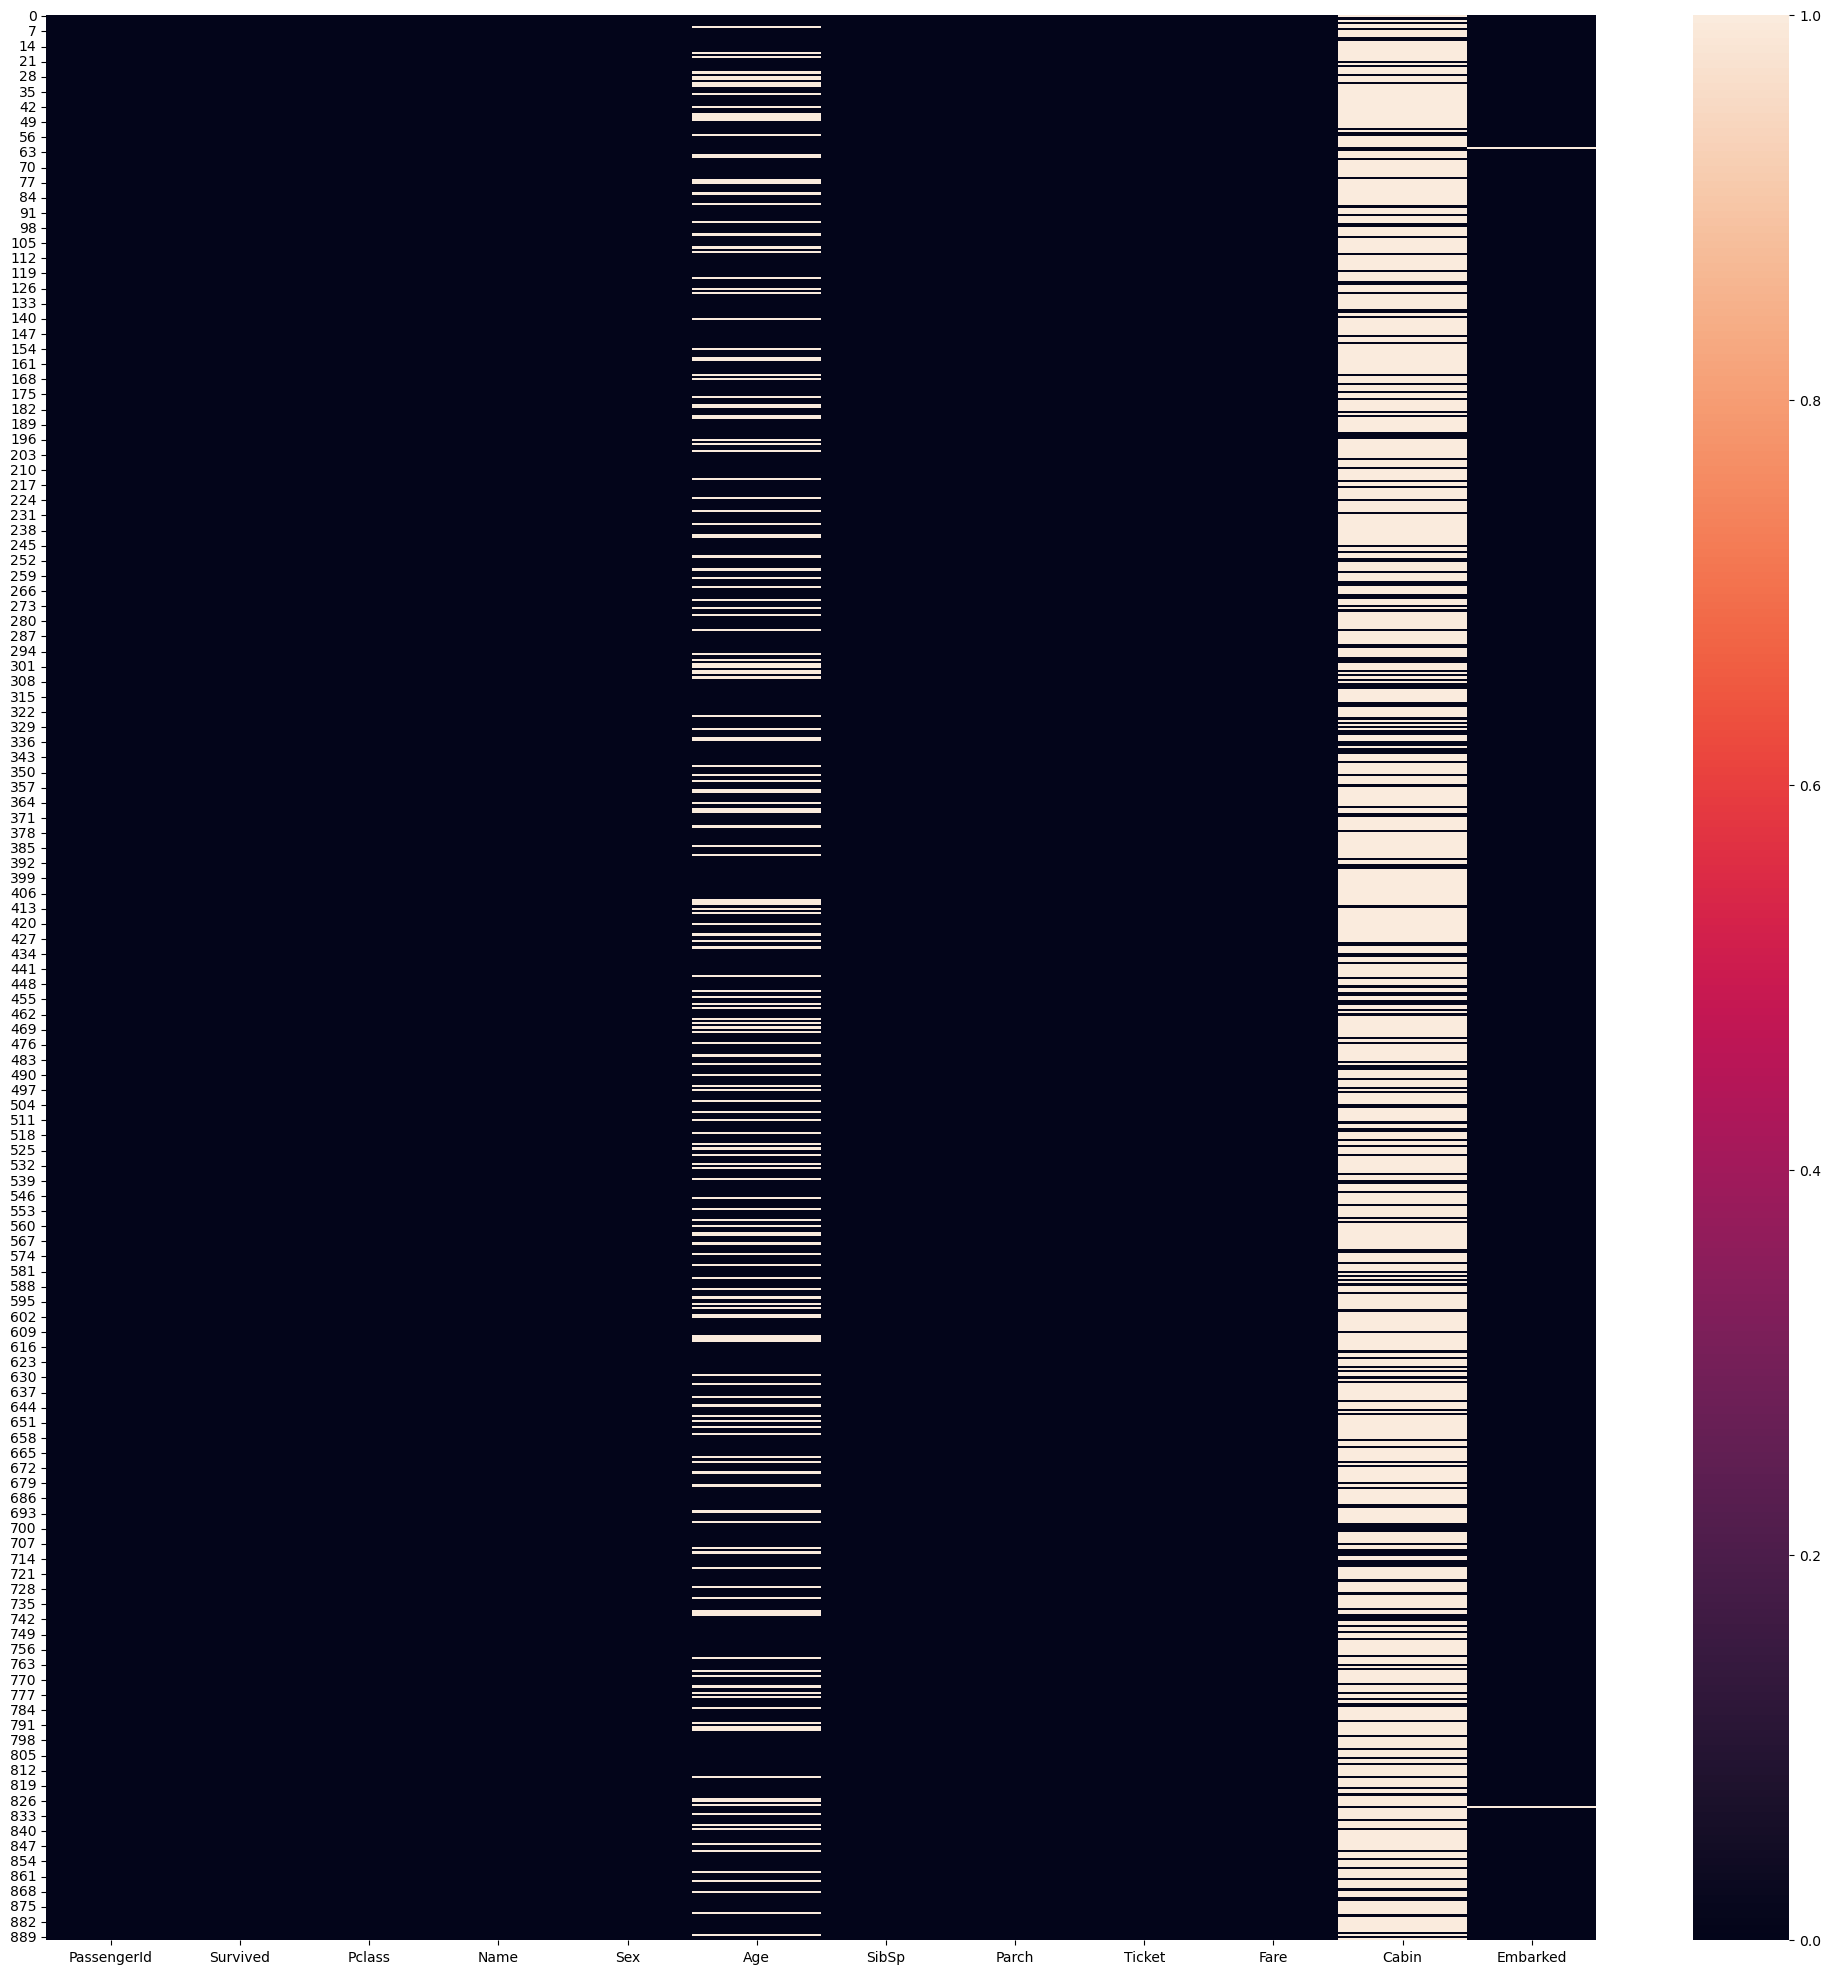

In [32]:
plt.figure(figsize=(25,25)) #sets the figure size for the plot
sns.heatmap(data.isnull()) #creates a heatmap visualization of the missing values in the dataset
plt.show()

In [33]:
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)
#The code calculates the percentage of missing values in each column of the dataset and then prints the resulting percenta

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [34]:
missing_value_column = missing_value_percent[missing_value_percent > 20].keys()
print(missing_value_column)
#The code is used to identify the columns in a dataset that have missing values exceeding 20%
#It retrieves the keys (column names) from the `missing_value_percent` dictionary where the corresponding values

Index(['Cabin'], dtype='object')


In [35]:
data1 = data.drop(columns = missing_value_column)
#dropping the columns in a dataset that have missing values exceeding 20%

In [36]:
data1 = data1.dropna(subset=["Embarked"]) #dropping the rows which have null values in column 'Embarked'

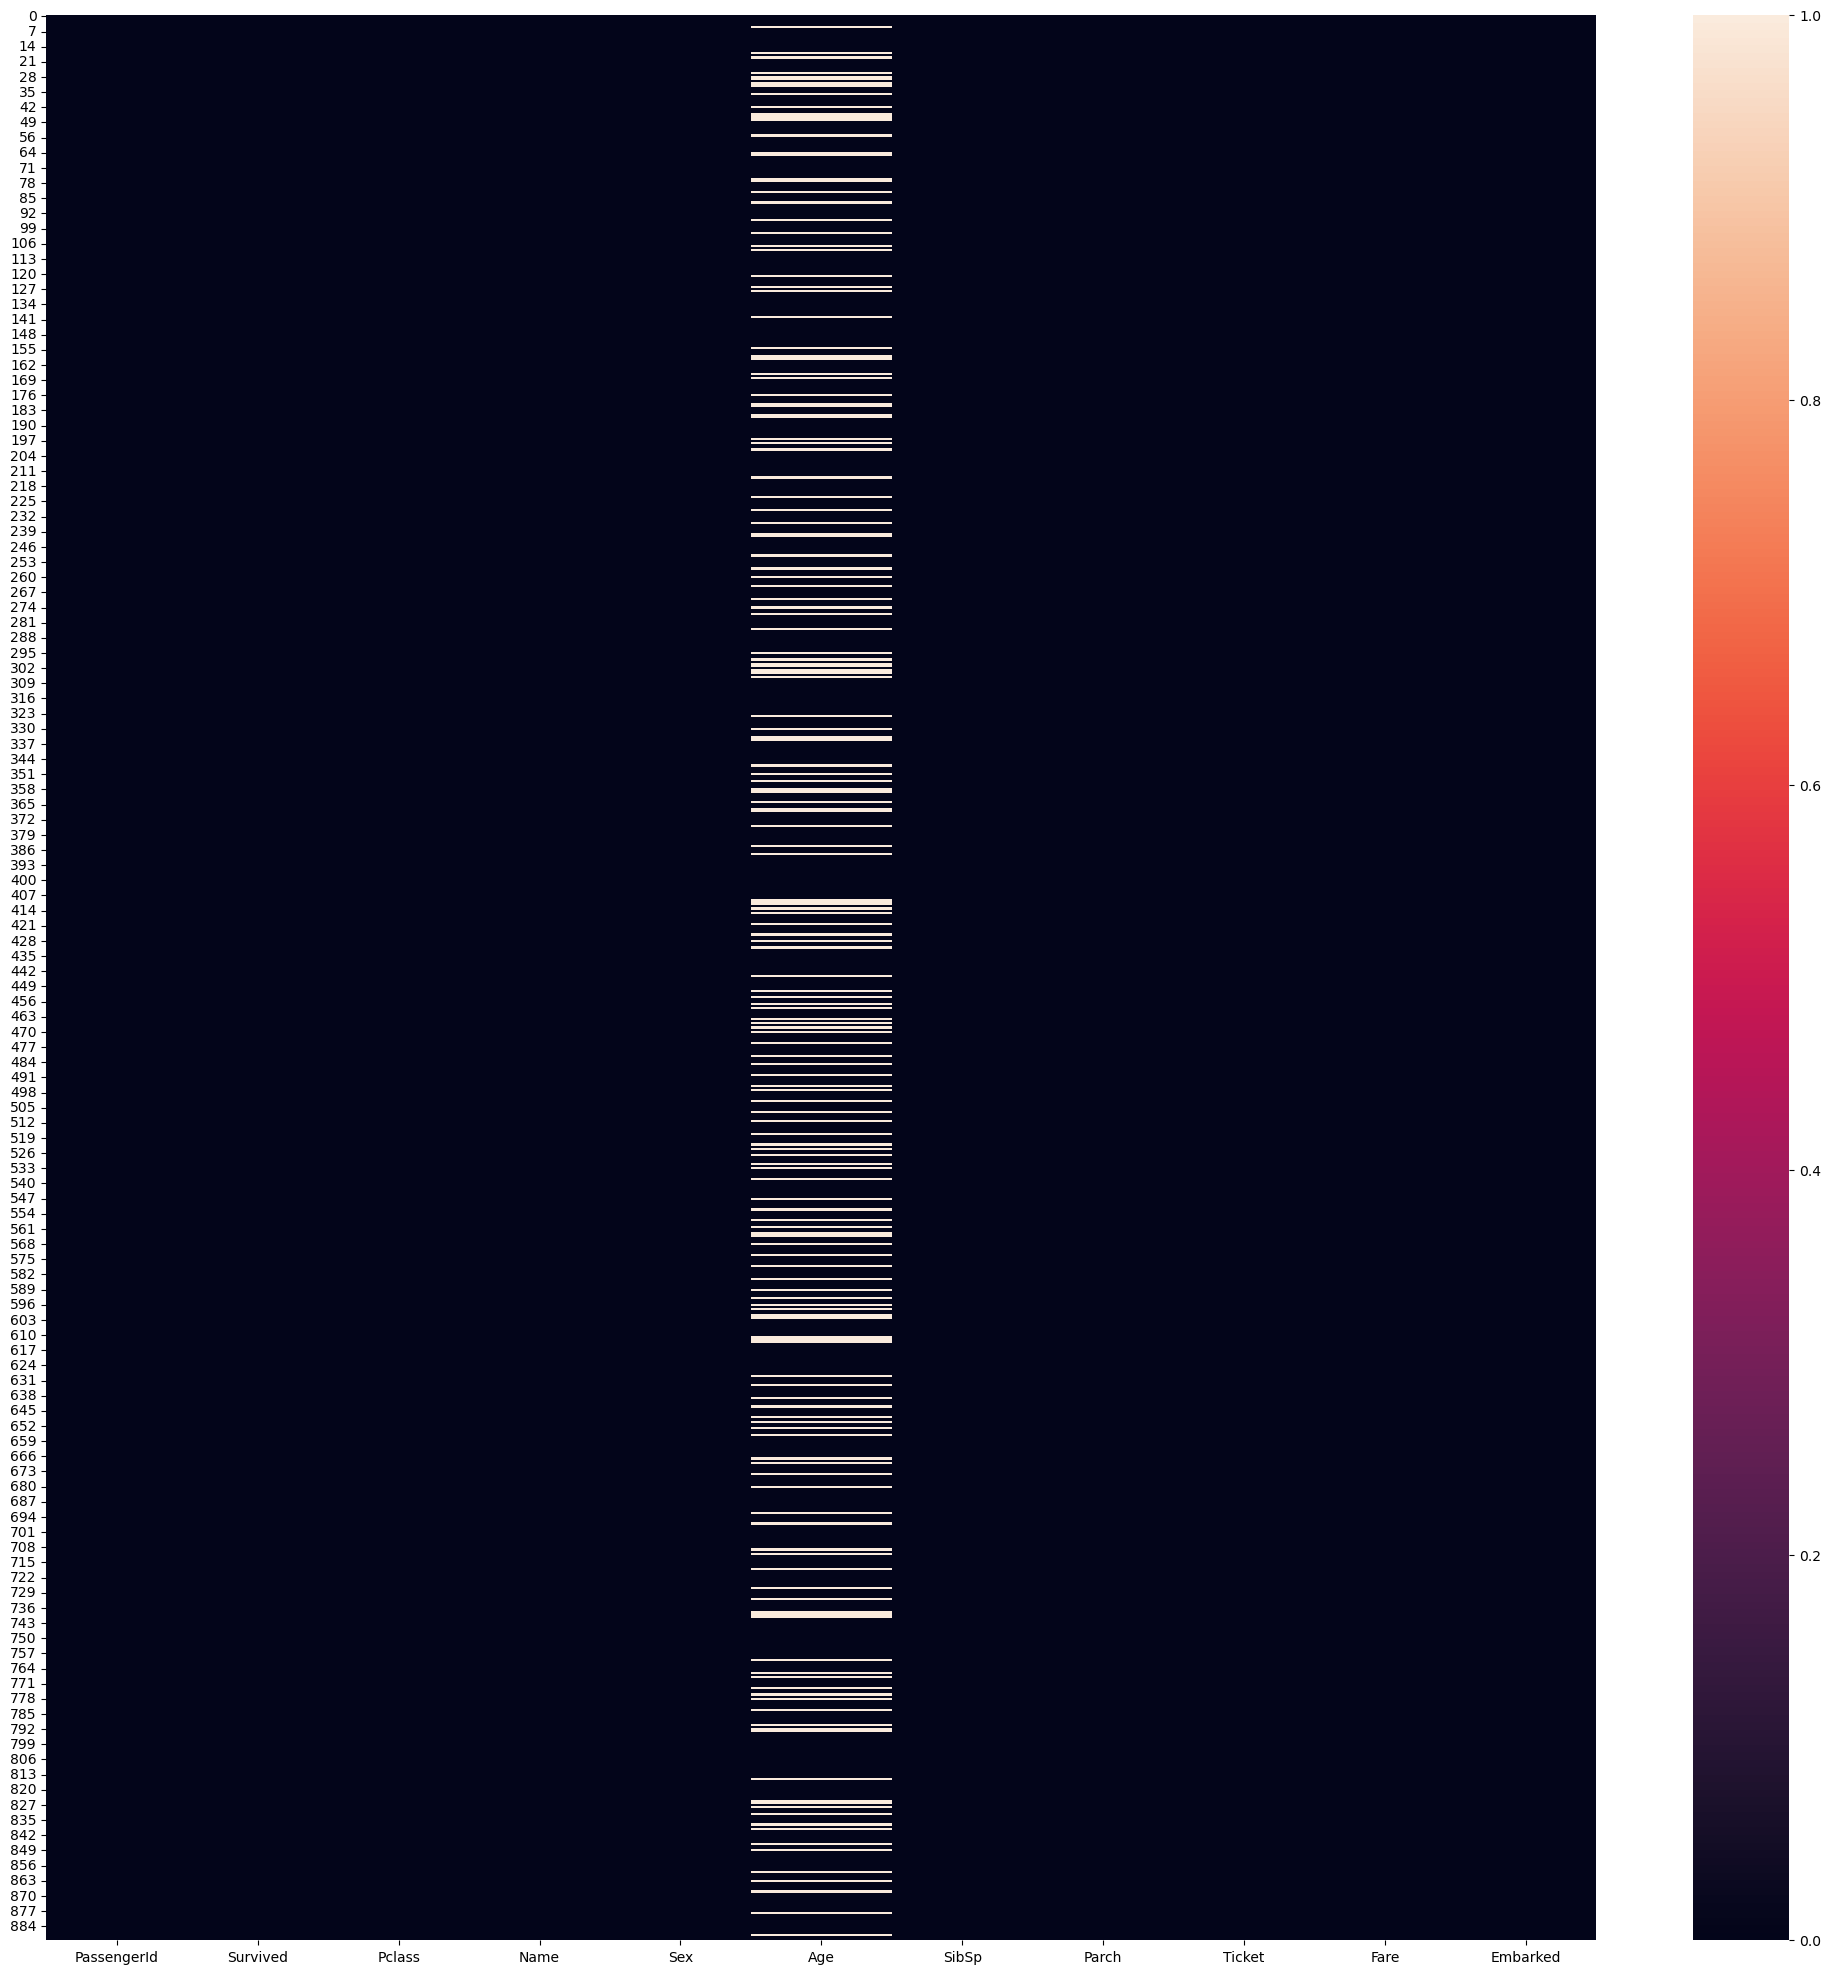

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(data1.isnull())
plt.show()

In [20]:
data1.shape

(889, 11)

In [37]:
numerical_DataFrame = data1.select_dtypes(include=['int64', 'float64'])
#selecting DataFrame that contains only numerical data types
numerical_DataFrame.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,NaN,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [22]:
numerical_DataFrame.shape

(889, 7)

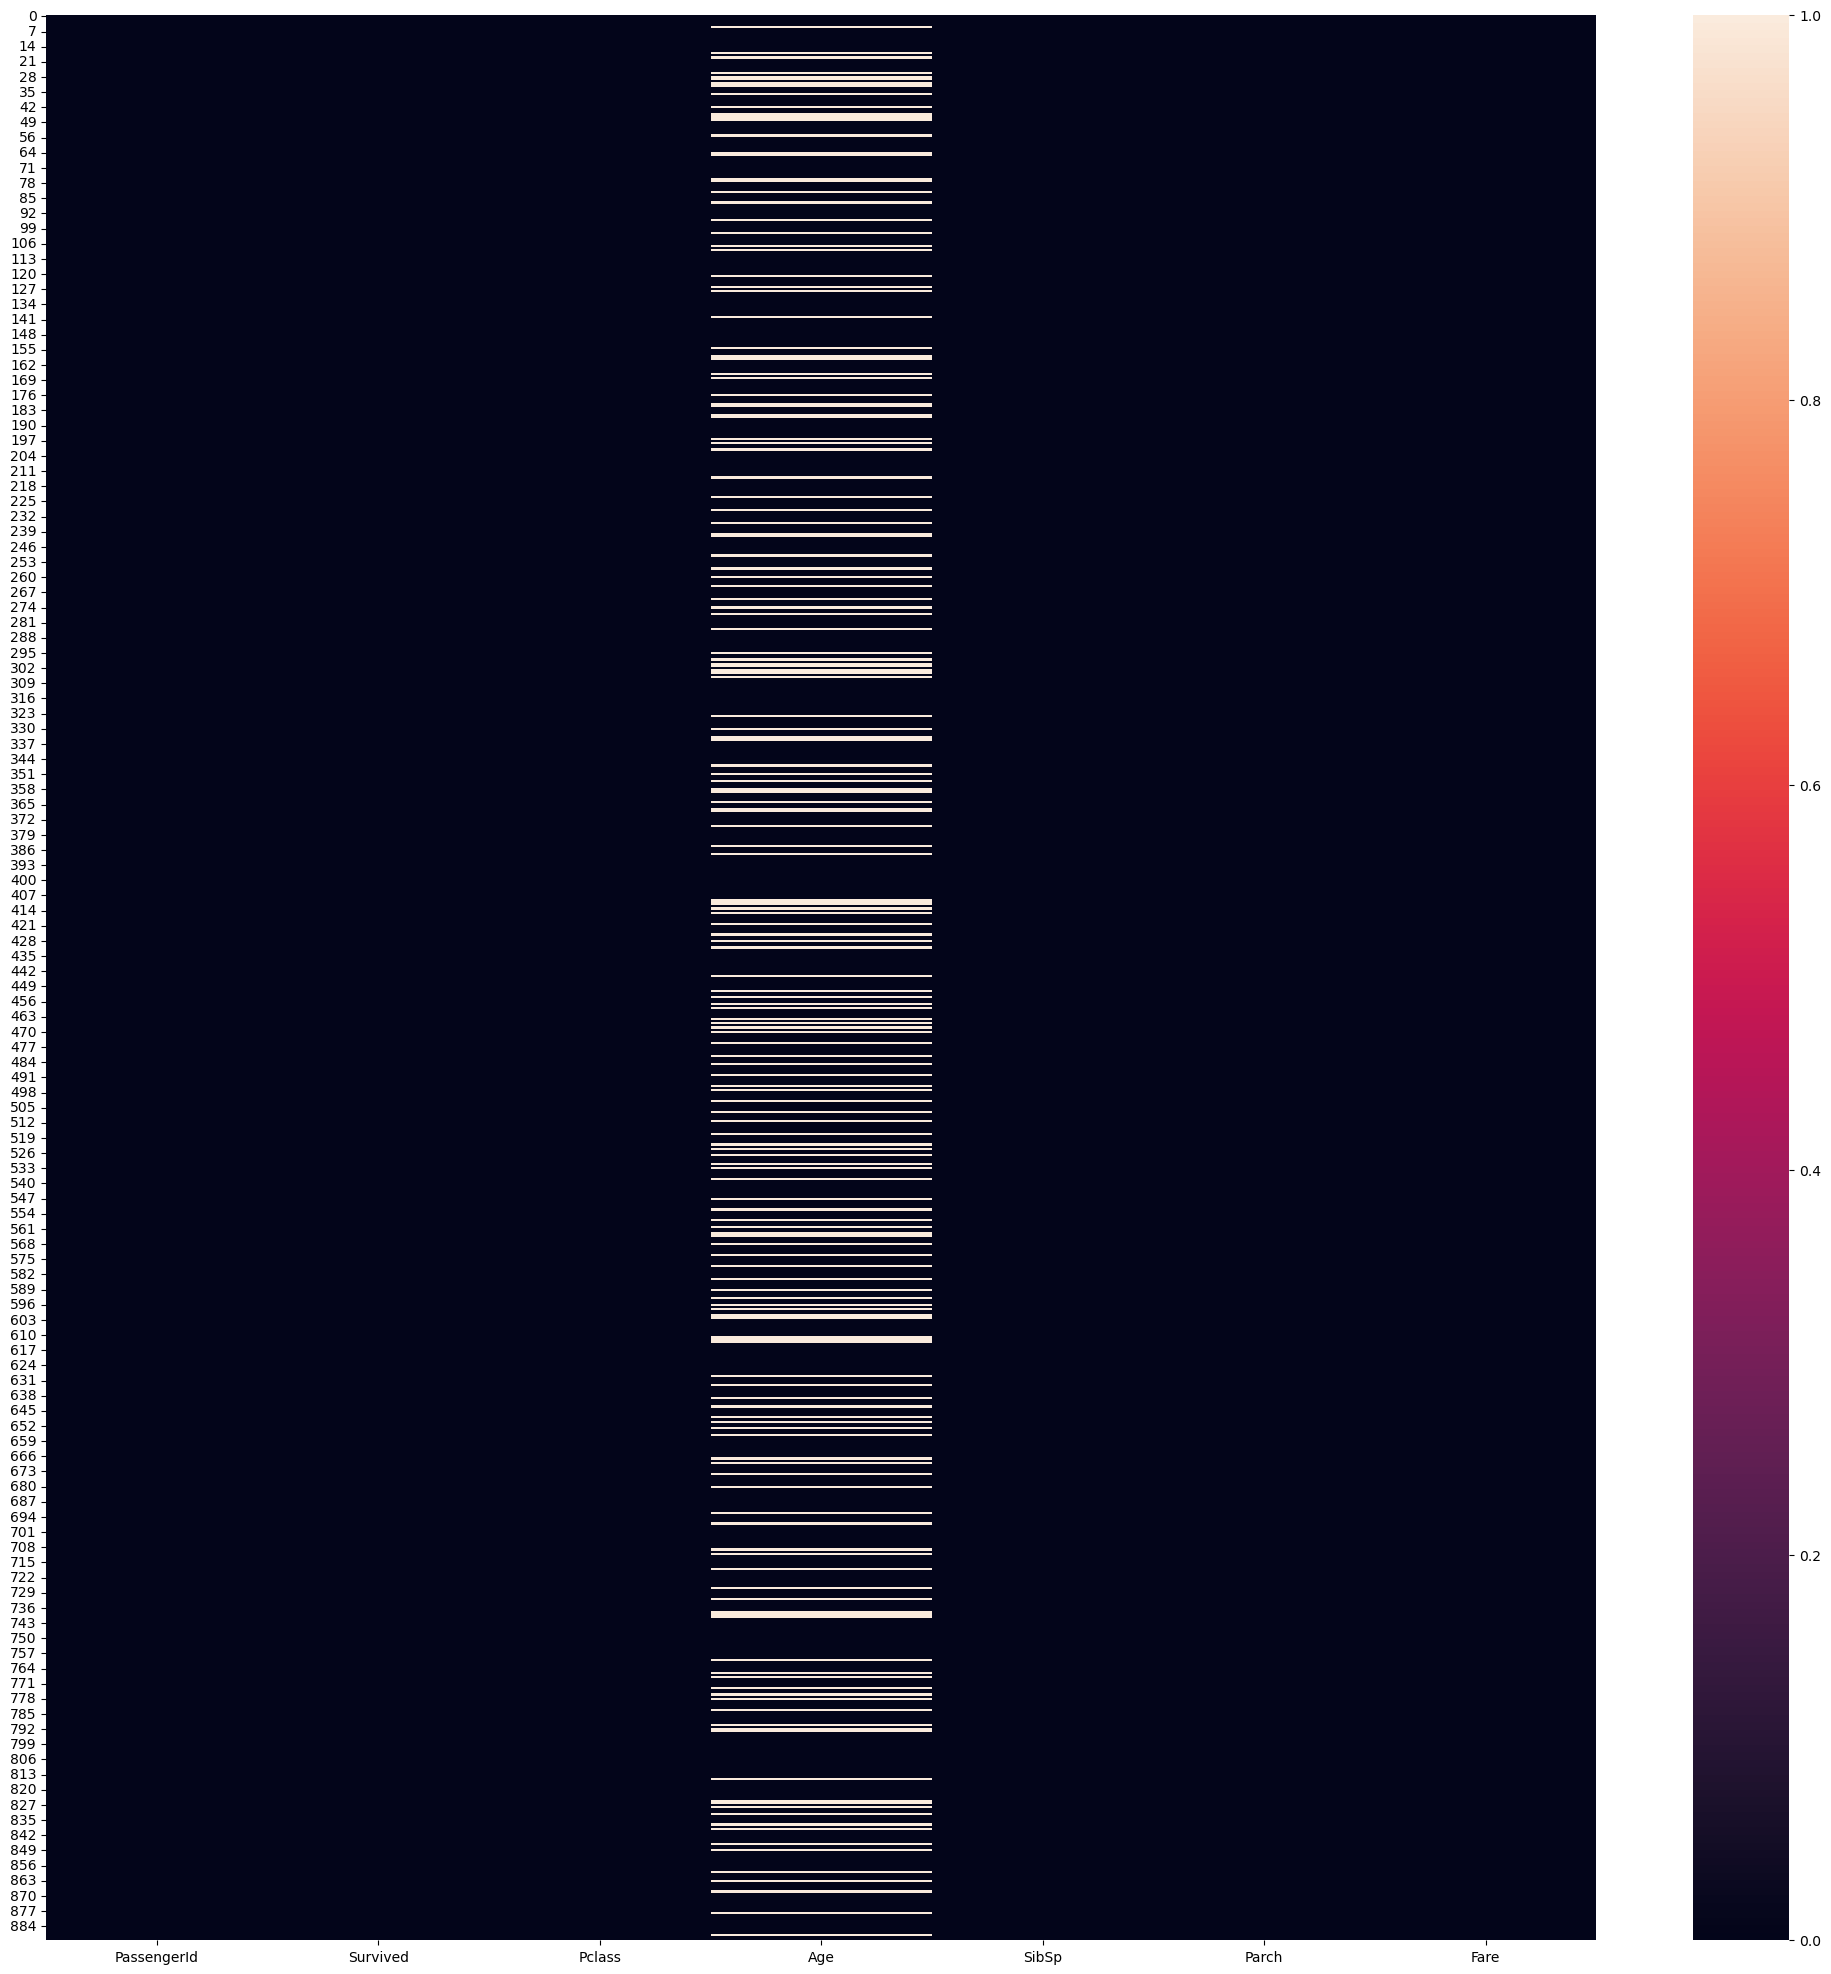

In [39]:
plt.figure(figsize=(25,25))
sns.heatmap(numerical_DataFrame.isnull())
# The code is used to get visualization of the missing values of numerical DataFrame.
plt.show()

In [40]:
numerical_DataFrame_null_Rows = numerical_DataFrame[numerical_DataFrame.isnull().any(axis=1)]
#filter rows in a DataFrame called `numerical_DataFrame` that contain at least one null value.
numerical_DataFrame_null_Rows.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6,0,3,NaN,0,0,8.4583
17,18,1,2,NaN,0,0,13.0000
19,20,1,3,NaN,0,0,7.2250
26,27,0,3,NaN,0,0,7.2250
28,29,1,3,NaN,0,0,7.8792


In [41]:
num_DF_MissingValue = numerical_DataFrame.isnull().sum()
print(num_DF_MissingValue)

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64


In [42]:
num_DF_MissingValue_columns = num_DF_MissingValue[num_DF_MissingValue > 0].keys()
print(num_DF_MissingValue_columns)
#to retrieve the column names from num_DF_MissingValue where the values are greater than zero (indicating missing values)

Index(['Age'], dtype='object')


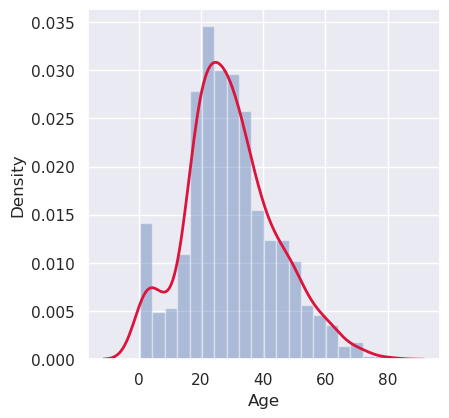

In [43]:
# Visualization of Missing Numeric Data Distribution
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_DF_MissingValue_columns):
    plt.subplot(2,2,i+1)
    sns.distplot(numerical_DataFrame[var], bins=20, kde_kws={'linewidth':2,'color':'#DC143C'})

In [44]:
#Filling Missing Values in “Age” Column with Mean as Measure of Central Tendency :
numerical_DataFrame_copy1 = numerical_DataFrame.copy() #Creating a copy of numerical_DataFrame
numerical_DataFrame_copy1.shape

(889, 7)

In [45]:
age_mean = numerical_DataFrame_copy1['Age'].mean() #Calculating mean of column Age and printing it
print('Age Mean: ',age_mean)

Age Mean:  29.64209269662921


In [46]:
numerical_DataFrame_copy1['Age'].fillna(age_mean,inplace=True)
numerical_DataFrame_copy1[num_DF_MissingValue_columns].isnull().sum()
# Filling the missing value Age column with it's mean and checking if the missing values of that column is handled.

Age    0
dtype: int64

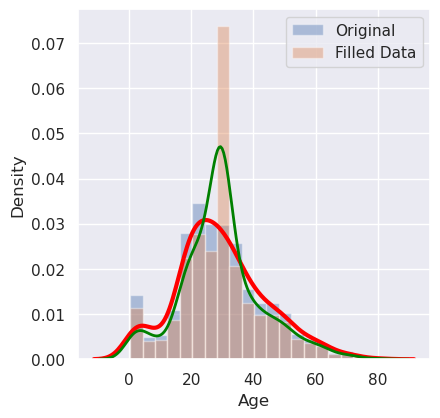

In [47]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_DF_MissingValue_columns):
    plt.subplot(2,2,i+1)
    sns.distplot(numerical_DataFrame[var], bins=20, kde_kws={'linewidth':3,'color':'red'}, label="Original",)
    sns.distplot(numerical_DataFrame_copy1[var], bins=20, kde_kws={'linewidth':2, 'color':'green'},label="Filled Data",)
    plt.legend()

In [48]:
#Concatenating Numerical DataFrames to Fill Missing Values
df_concat = pd.concat([numerical_DataFrame[num_DF_MissingValue_columns],numerical_DataFrame_copy1[num_DF_MissingValue_columns]],
            axis=1)

In [49]:
df_concat_DF = df_concat[df_concat.isnull().any(axis=1)]
df_concat_DF.head(5)

,Age,Age
5,NaN,29.642093
17,NaN,29.642093
19,NaN,29.642093
26,NaN,29.642093
28,NaN,29.642093


In [50]:
data1['Age']=numerical_DataFrame_copy1['Age']

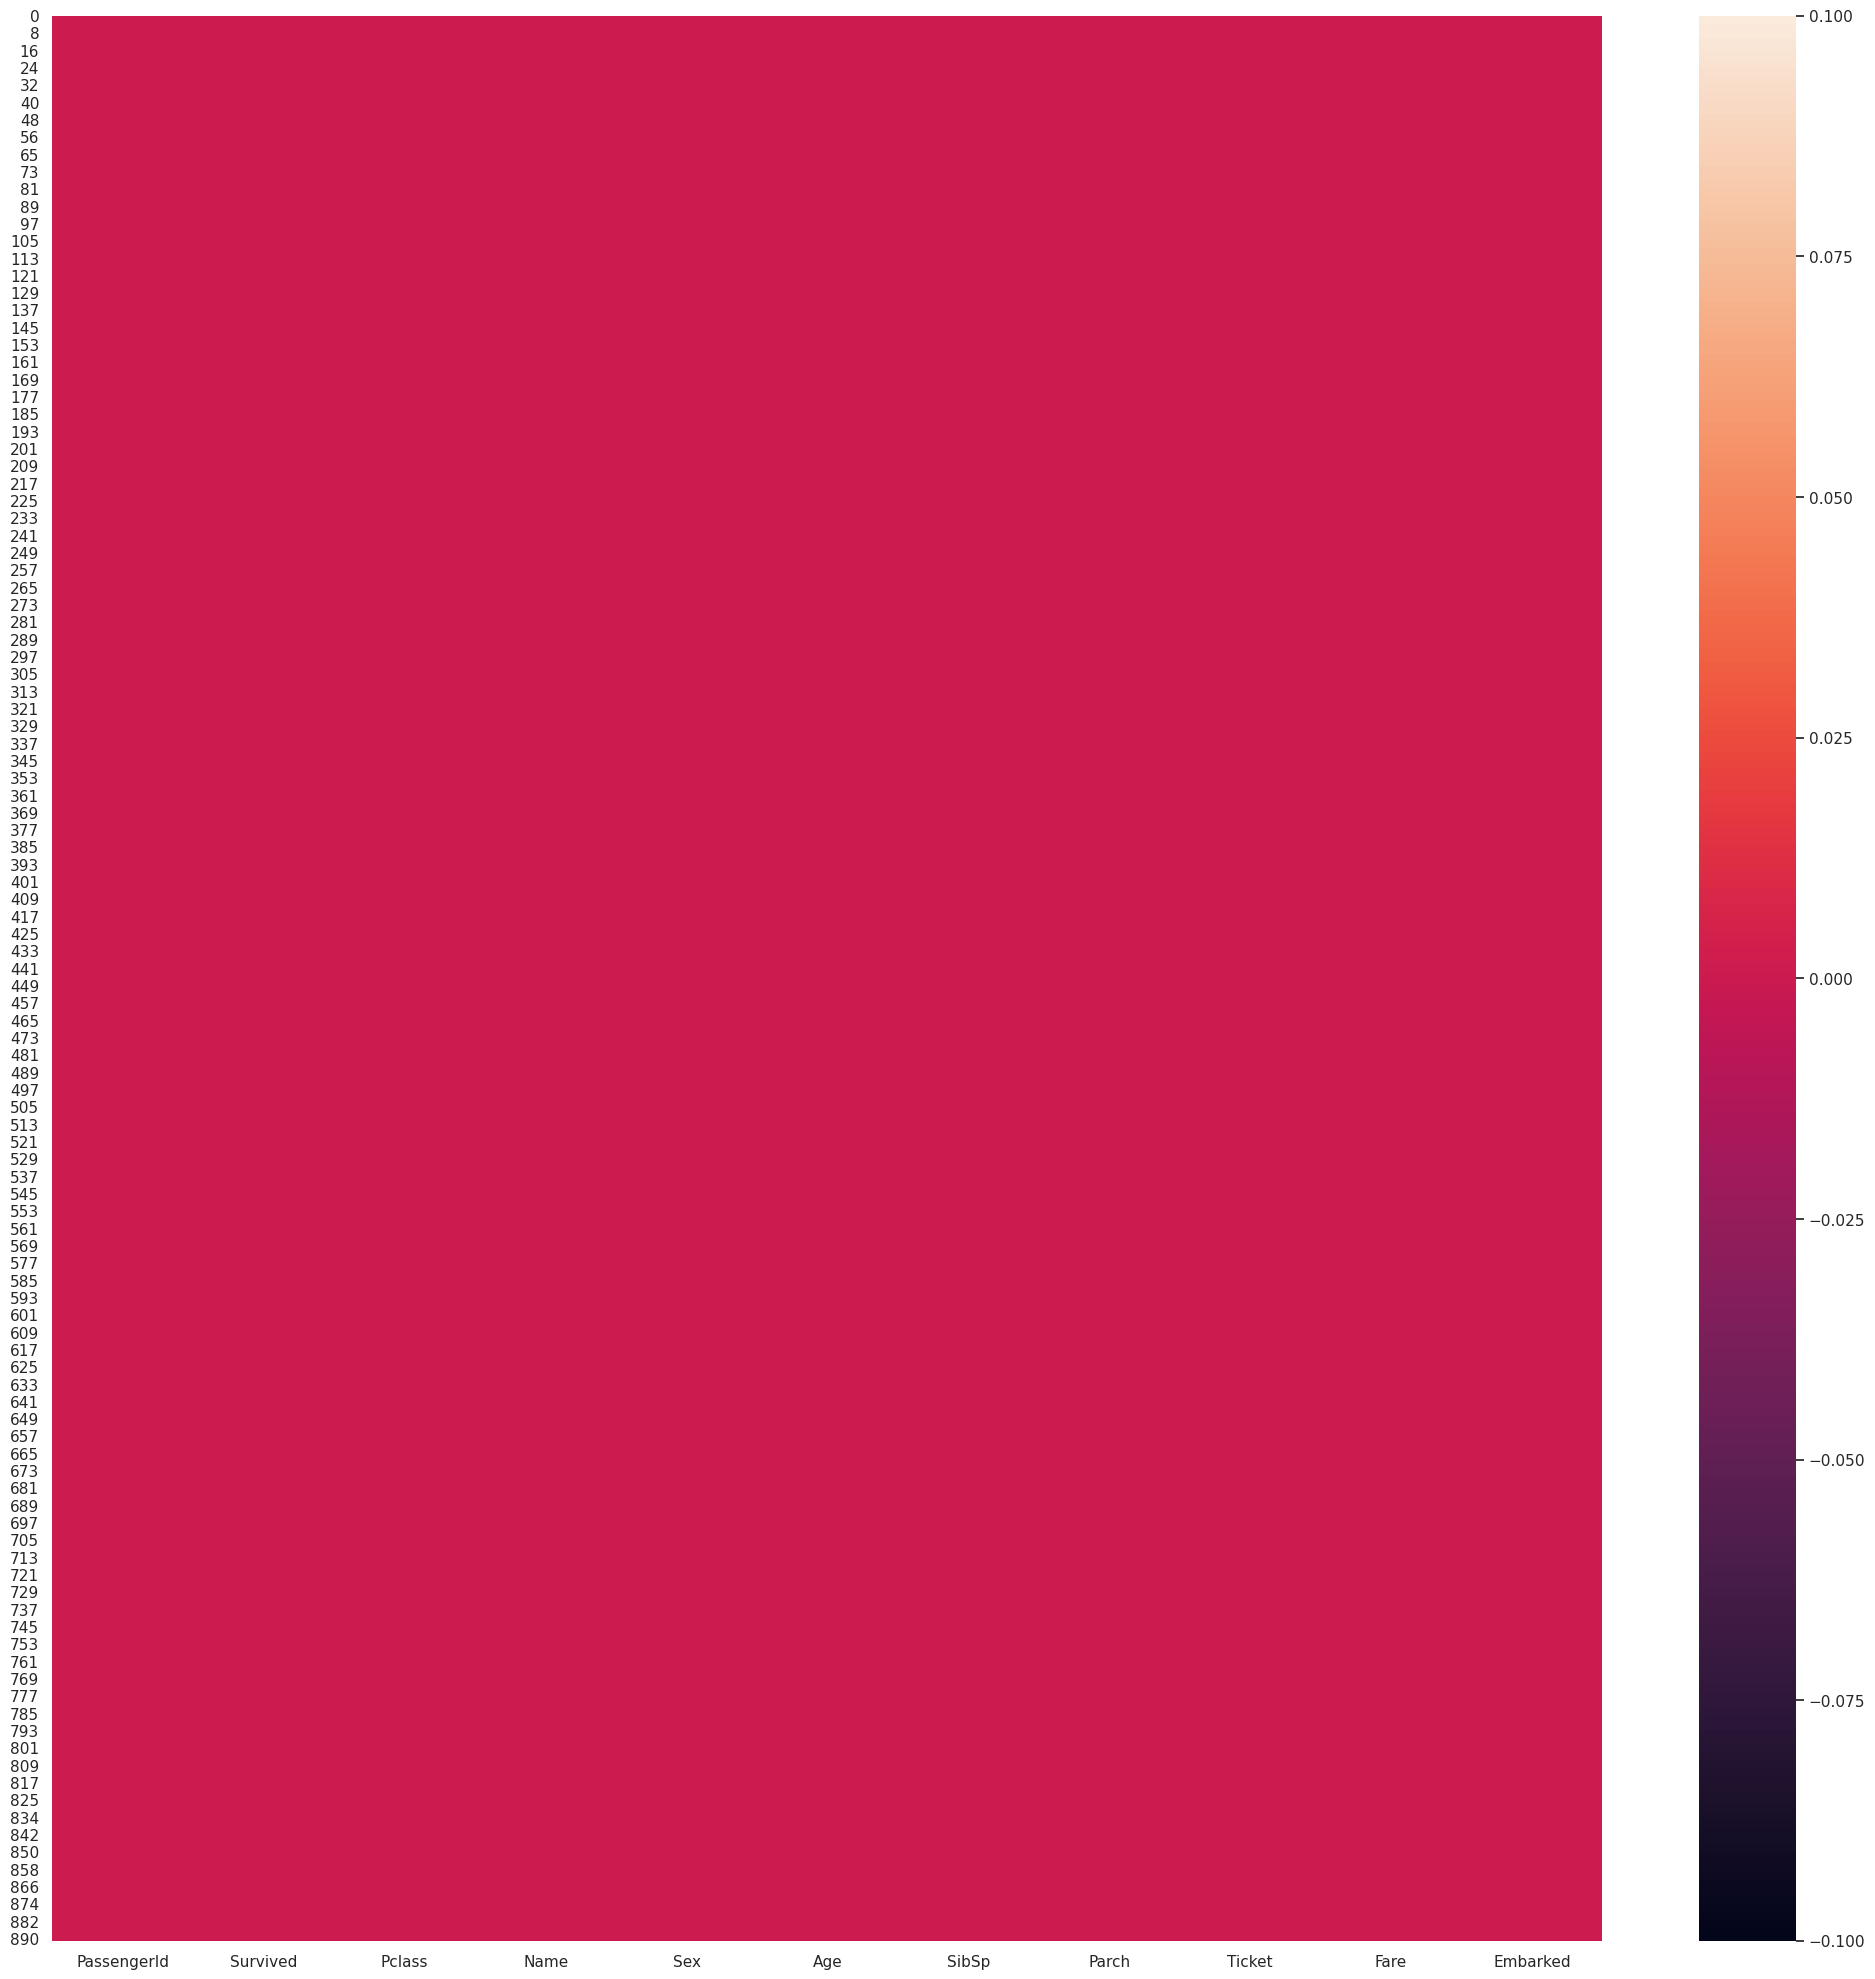

In [51]:
plt.figure(figsize=(25,25))
sns.heatmap(data1.isnull())
plt.show()

In [ ]:
#Hence Dataset is Cleaned